# Text classification using Native Baynes

Dataset: https://www.kaggle.com/shashwatwork/consume-complaints-dataset-fo-nlp

We demonstrate the text classification using the method, Native Baynes.

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sn
import matplotlib.pyplot as plt

Load data from csv file

In [2]:
df = pd.read_csv('complaints_processed.csv', index_col=0)

In [3]:
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [4]:
temp = df['product'].value_counts().to_frame()
temp

,product
credit_reporting,91179
debt_collection,23150
mortgages_and_loans,18990
credit_card,15566
retail_banking,13536


<AxesSubplot:ylabel='product'>

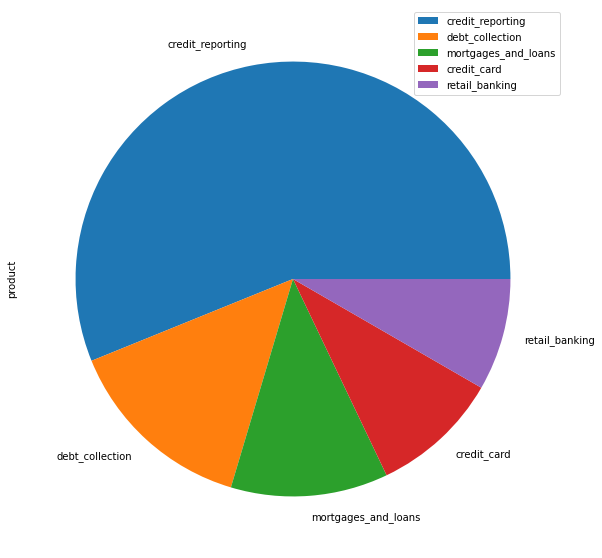

In [5]:
pd.DataFrame(temp).plot.pie(y='product', figsize=(12,10))

The data is not evenly distributed.

Label the classes with the integers

In [6]:
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])

Clean the data

In [8]:
def clean_doc(data):
    data = data.str.lower() # change to lower capital
    data = data.str.replace(r'[\d]',' ') # remove digits
    data = data.str.replace('[{}]'.format(string.punctuation), '') # remove punctuation
    data = data.fillna('') # fill 'nan' with ''
    return data

In [9]:
df['narrative'] = clean_doc(df['narrative'])

Split the train and test sets

In [10]:
X = df['narrative'].values.astype('U') # Features
y = df['product'].values               # Labels

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.2,random_state=21)

Convert to a matrix of token counts

In [13]:
Count = CountVectorizer(analyzer = 'word', ngram_range=(2,2))

In [14]:
train_X = Count.fit_transform(train_X)
test_X = Count.transform(test_X)

# Naive Bayes classifier

In [15]:
steps = [('clf', MultinomialNB())]
pipeline = Pipeline(steps)

In [16]:
param_dist={'clf__alpha':np.arange(1,100,1)}

In [17]:
clf_cv = RandomizedSearchCV(pipeline, param_dist, n_iter=50)

In [18]:
clf_cv.fit(train_X, train_y)

RandomizedSearchCV(estimator=Pipeline(steps=[('clf', MultinomialNB())]),
                   n_iter=50,
                   param_distributions={'clf__alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

# Performance

In [19]:
def performance_metrics(truedata, prediction):
    print('Metrics')
    print('====================================')
    print('Balanced accuracy: ', round(balanced_accuracy_score(truedata, prediction),3))
    print('F1 score (micro): ', round(f1_score(truedata, prediction, average='micro'),3))
    print('Precision score (micro): ', round(precision_score(truedata, prediction, average='micro'),3))
    print('Recall score (micro): ', round(recall_score(truedata, prediction, average='micro'),3))

In [27]:
pred = clf_cv.predict(test_X)

In [22]:
performance = performance_metrics(test_y, pred)

Metrics
Balanced accuracy:  0.75
F1 score (micro):  0.839
Precision score (micro):  0.839
Recall score (micro):  0.839


# Confusion matrix

In [25]:
def plot_confusion_matrix(truedata, prediction):
    cmatrix = pd.DataFrame(confusion_matrix(truedata, prediction))
    columns = le.inverse_transform(list(cmatrix.index))
    cmatrix.columns = columns
    cmatrix.index = columns
    plt.figure(figsize=(12,8))
    sn.set(font_scale=1.5) # for label size
    sn.heatmap(cmatrix, annot=True, annot_kws={"size": 15})

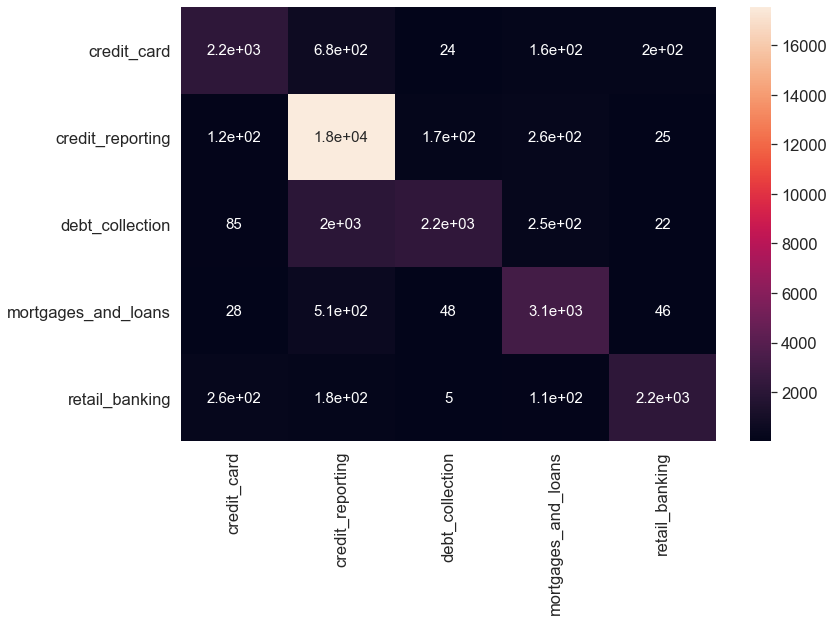

In [26]:
plot_confusion_matrix(test_y, pred)